In [24]:
##Code inspired from https://www.kaggle.com/code/ahmedkhairullah/animal-image-classification
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn import svm 
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import scipy
     

In [12]:
IMAGE_SIZE = [224 , 224]

In [13]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

In [14]:
train_diretory = './Data/Training Data modified/Training Data modified/'
test_diretory = './Data/Testing Data modified/Testing Data modified/'
val_diretory = './Data/Validation Data modified/Vaildation Data modified/'

In [15]:
folders = glob('./Data/Training Data modified/Training Data modified/*')
len_folders = len(folders)

In [16]:
from keras.regularizers import l2

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:


model = Model(inputs=vgg.input, outputs=prediction)
model.summary() 
print(vgg.output)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
train_datagen =   ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_diretory,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle=True,
                                                    )

print(len(training_set[0]))

test_set = test_datagen.flow_from_directory(test_diretory, 
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 10000 images belonging to 5 classes.
2
Found 859 images belonging to 5 classes.


In [20]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=8,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

model.save('model.h5')

C:\Users\Ander\AppData\Local\Temp\ipykernel_14924\3999097235.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/8
146/313 [============>.................] - ETA: 5:39 - loss: 0.5887 - accuracy: 0.7836

KeyboardInterrupt: 

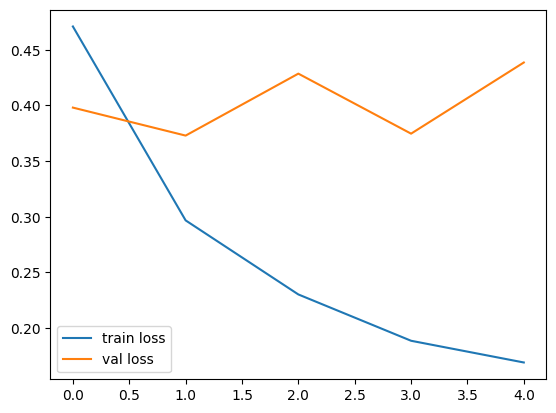

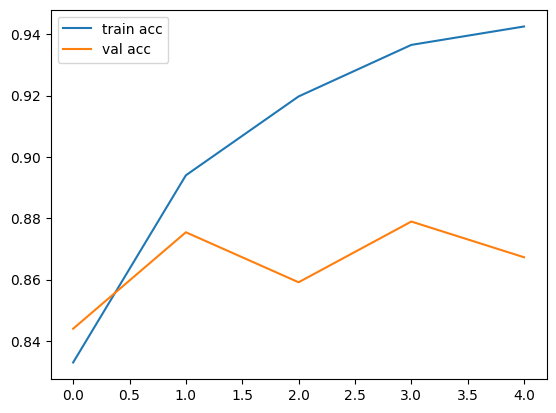

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [30]:
model_animals = load_model('model.h5')

animals_classes = training_set.class_indices
classes = {v: k for k, v in animals_classes.items()}
print(classes)

{0: 'Beetle', 1: 'Butterfly', 2: 'Cat', 3: 'Cow', 4: 'Dog'}


In [31]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model_animals.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = classes[y]
    return res

In [42]:
#predict 10 random images from test set
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
from glob import glob

test_dir = './Data/Testing Data modified/Testing Data modified/'
test_files = os.listdir(test_dir)
test_imgs = [os.path.join(test_dir, f) for f in test_files]
test_imgs = glob('./Data/Testing Data modified/Testing Data modified/*/*')

for i in range(10):
    path = random.choice(test_imgs)
    pic = mpimg.imread(path)
    prediction = output(path)
    print(prediction)
    plt.imshow(pic)
    plt.show()






TypeError: path should be path-like or io.BytesIO, not <class 'numpy.ndarray'>